# Import packages

In [1]:
import sys
#sys.path.append("D:\Julian\workspace\endolas")
sys.path.append("/home/julian/Documents/Studium/MT-Masterarbeit/Workspace/endolas")

import numpy as np
import matplotlib.pyplot as plt
from endolas import utils
import os
import importlib
import random

import pandas as pd
import seaborn as sns

Segmentation Models: using `tf.keras` framework.


# Load data and plot

In [2]:
width = 384
height = 384

series = 7
experiment = 4
#evalutaion_csv = os.path.abspath('../{}_{}_euclidean/evaluation_spatial.csv'.format(series, experiment))
evalutaion_csv = os.path.abspath('../{}_{}_euclidean/history/evaluation_history.csv'.format(series, experiment))
data = pd.read_csv(evalutaion_csv)

In [6]:
data

,Unnamed: 0,x,y,Point,Epoch
0,0,98,330,2,10
1,1,116,328,3,10
2,2,130,327,4,10
3,3,142,325,5,10
4,4,159,324,6,10
...,...,...,...,...,...
3045,3045,265,56,319,100
3046,3046,281,56,320,100
3047,3047,297,57,321,100
3048,3048,312,57,322,100


In [42]:
frames = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Distribution

In [43]:
def kernel(current_frame):
    data_print = data[data.Epoch==current_frame]

    plt.clf()
    plt.cla()
    plt.close()

    plt.rcParams['figure.figsize'] = 12,12
    ax = plt.axes()
    #ax.axhline(67, linewidth=1, color='gray')
    #ax.axhline(90, linewidth=1, color='gray')
    #ax.axhline(112, linewidth=1, color='gray')
    #ax.axhline(134, linewidth=1, color='gray')
    #ax.axhline(157, linewidth=1, color='gray')

    #ax.axvline(67, linewidth=1, color='gray')
    #ax.axvline(90, linewidth=1, color='gray')
    #ax.axvline(112, linewidth=1, color='gray')
    #ax.axvline(134, linewidth=1, color='gray')
    #ax.axvline(157, linewidth=1, color='gray')

    sns.set()
    ax.set(ylim=(0, 384))
    ax.set(xlim=(0, width))
    ax.xaxis.set_ticks([0,56,72,88,104,120,136,152,168,184,200,216,232,248,264,280,296,312,328,384])
    ax.xaxis.set_label_position('top') 
    ax.xaxis.set_ticks_position('top')
    plt.xticks(rotation=90)
    ax.yaxis.set_ticks([0,56,72,88,104,120,136,152,168,184,200,216,232,248,264,280,296,312,328,384])
    ax.invert_yaxis()
    ax.set_yticklabels([])
    ax.set_xticklabels([])


    plt.tick_params(top=False)

    #pal = sns.color_palette("Set1", n_colors=1, desat=.5)

    ax = sns.scatterplot(x="x", y="y",hue='Epoch', linewidth=2.5,data=data_print,s=100, ax=ax, palette=['black'])
        
    ax.legend().set_visible(False)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_aspect('equal')
    plt.savefig(os.path.abspath('../{}_{}_euclidean/history/display_{}.png'.format(series, experiment, current_frame)))

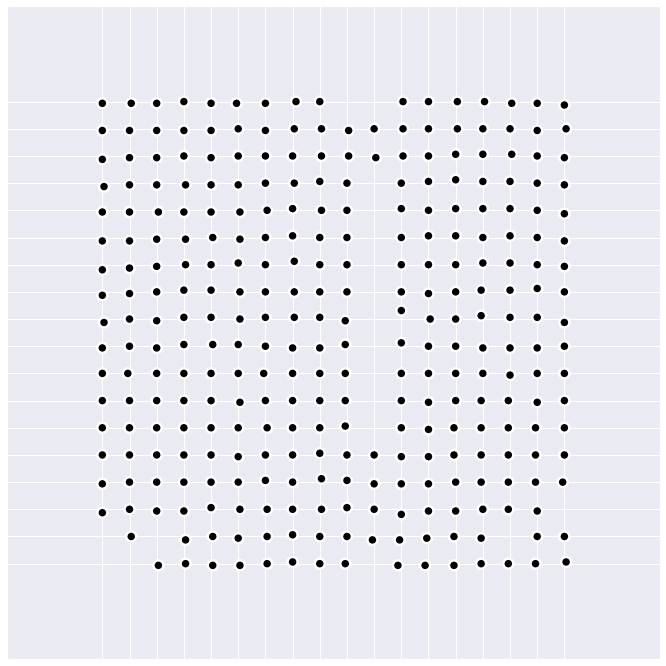

In [44]:
for current_frame in frames:
    kernel(current_frame)
    
    if current_frame == 10:
        kernel(current_frame)
    